In [1]:
!pip install kaggle

In [1]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:00<00:00, 234MB/s]
100% 163M/163M [00:00<00:00, 223MB/s]


In [3]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [4]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_751.jpg', 'with_mask_160.jpg', 'with_mask_2583.jpg', 'with_mask_1947.jpg', 'with_mask_1642.jpg']
['with_mask_376.jpg', 'with_mask_2389.jpg', 'with_mask_2449.jpg', 'with_mask_1960.jpg', 'with_mask_1389.jpg']


In [7]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_246.jpg', 'without_mask_3620.jpg', 'without_mask_3295.jpg', 'without_mask_3316.jpg', 'without_mask_2173.jpg']
['without_mask_3677.jpg', 'without_mask_302.jpg', 'without_mask_1802.jpg', 'without_mask_3135.jpg', 'without_mask_1411.jpg']


In [8]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two class of Images

with mask --> 1

without mask --> 0

In [9]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [10]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [12]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


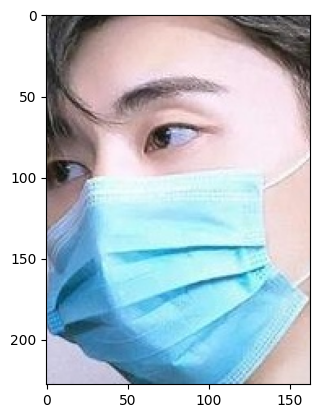

In [13]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

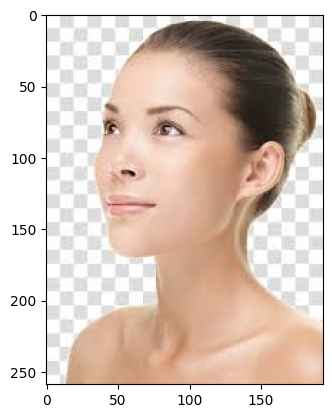

In [14]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [15]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
type(data)

list

In [17]:
len(data)

7553

In [18]:
data[0]

array([[[ 20,  71, 100],
        [ 20,  71, 100],
        [ 22,  73, 100],
        ...,
        [  3,  39,  58],
        [  3,  38,  57],
        [  3,  38,  57]],

       [[ 22,  72, 102],
        [ 22,  72, 102],
        [ 23,  73, 101],
        ...,
        [  4,  39,  58],
        [  4,  38,  57],
        [  4,  38,  57]],

       [[ 24,  72, 102],
        [ 24,  72, 102],
        [ 24,  71, 100],
        ...,
        [  6,  39,  58],
        [  7,  37,  57],
        [  7,  37,  57]],

       ...,

       [[  8,  23,  29],
        [  8,  23,  28],
        [  7,  21,  26],
        ...,
        [ 61,  86, 100],
        [ 46,  70,  84],
        [ 39,  62,  76]],

       [[  4,  21,  28],
        [  5,  21,  28],
        [  5,  20,  27],
        ...,
        [ 40,  63,  76],
        [ 29,  53,  66],
        [ 24,  47,  60]],

       [[  1,  18,  26],
        [  2,  18,  26],
        [  4,  19,  27],
        ...,
        [ 20,  44,  56],
        [ 13,  37,  49],
        [  9,  33,  45]]

In [19]:
type(data[0])

numpy.ndarray

In [20]:
data[0].shape

(128, 128, 3)

In [21]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [22]:
type(X)

numpy.ndarray

In [23]:
type(Y)

numpy.ndarray

In [24]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [25]:
print(Y)

[1 1 1 ... 0 0 0]


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [28]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [29]:
X_train[0]

array([[[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       ...,

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]]

In [30]:
X_train_scaled[0]

array([[[0.98039216, 0.98039216, 0.98039216],
        [0.98039216, 0.98039216, 0.98039216],
        [0.98039216, 0.98039216, 0.98039216],
        ...,
        [0.98039216, 0.98039216, 0.98039216],
        [0.98039216, 0.98039216, 0.98039216],
        [0.98039216, 0.98039216, 0.98039216]],

       [[0.98039216, 0.98039216, 0.98039216],
        [0.98039216, 0.98039216, 0.98039216],
        [0.98039216, 0.98039216, 0.98039216],
        ...,
        [0.98039216, 0.98039216, 0.98039216],
        [0.98039216, 0.98039216, 0.98039216],
        [0.98039216, 0.98039216, 0.98039216]],

       [[0.98039216, 0.98039216, 0.98039216],
        [0.98039216, 0.98039216, 0.98039216],
        [0.98039216, 0.98039216, 0.98039216],
        ...,
        [0.98039216, 0.98039216, 0.98039216],
        [0.98039216, 0.98039216, 0.98039216],
        [0.98039216, 0.98039216, 0.98039216]],

       ...,

       [[0.98039216, 0.98039216, 0.98039216],
        [0.98039216, 0.98039216, 0.98039216],
        [0.98039216, 0

In [31]:
import tensorflow as tf
from tensorflow import keras

In [32]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [33]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [34]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 16s 21ms/step - loss: 0.4703 - acc: 0.8071 - val_loss: 0.2866 - val_acc: 0.8893
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2821 - acc: 0.8876 - val_loss: 0.2350 - val_acc: 0.9058
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2348 - acc: 0.9102 - val_loss: 0.2271 - val_acc: 0.9091
Epoch 4/5
170/170 [==============================] - 4s 21ms/step - loss: 0.2052 - acc: 0.9204 - val_loss: 0.2251 - val_acc: 0.9240
Epoch 5/5
170/170 [==============================] - 4s 22ms/step - loss: 0.1741 - acc: 0.9329 - val_loss: 0.2058 - val_acc: 0.9207


In [35]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.1975 - acc: 0.9212
Test Accuracy = 0.921244204044342


In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/data/with_mask/with_mask_1827.jpg


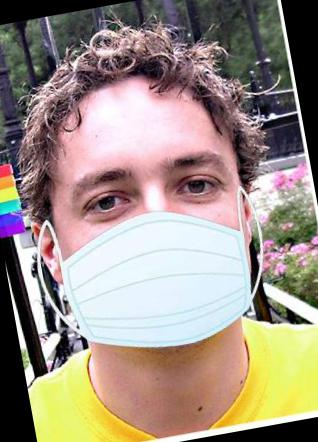

1/1 [==============================] - 0s 30ms/step
[[0.31165928 0.66439706]]
1
The person in the image is wearing a mask


In [42]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')